In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from cmocean import cm
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable

from PyFVCOM.read import ncread

In [3]:
# Load the model output.
fvcom = 'sample.nc'

# Extract only the first 20 time steps.
dims = {'time': ':20'}

# And only these variables
varlist = ('lon', 'lat', 'nv', 'zeta', 'Times')

FVCOM = ncread(fvcom, vars=varlist, dims=dims, noisy=True)

File format: NETCDF4
Found nprocs 
Found partition 
Found x 
Found y 
Found lon (extracted [0:73683])
Found lat (extracted [0:73683])
Found xc 
Found yc 
Found lonc 
Found latc 
Found siglay 
Found siglev 
Found siglay_center 
Found siglev_center 
Found h_center 
Found h 
Found nv (extracted [0:3, 0:142092])
Found iint 
Found time 
Found Itime 
Found Itime2 
Found Times (extracted [:20, 0:26])
Found zeta (extracted [:20, 0:73683])
Found file_date 
Found nbe 
Found ntsn 
Found nbsn 
Found ntve 
Found nbve 
Found a1u 
Found a2u 
Found aw0 
Found awx 
Found awy 
Found art2 
Found art1 
Found u 
Found v 
Found tauc 
Found omega 
Found ww 
Found ua 
Found va 
Found temp 
Found salinity 
Found viscofm 
Found viscofh 
Found km 
Found kh 
Found kq 
Found q2 
Found q2l 
Found l 
Found wet_nodes 
Found wet_cells 
Found wet_nodes_prev_int 
Found wet_cells_prev_int 
Found wet_cells_prev_ext 


In [4]:
# Lay the groundwork for a plot of the model surface.

triangles = FVCOM['nv'].transpose() - 1  # offset for Python indexing.

extents = np.array((FVCOM['lon'].min(),
                    FVCOM['lon'].max(),
                    FVCOM['lat'].min(),
                    FVCOM['lat'].max()))

m = Basemap(llcrnrlon=extents[0],
            llcrnrlat=extents[2],
            urcrnrlon=extents[1],
            urcrnrlat=extents[3],
            rsphere=(6378137.00, 6356752.3142),
            resolution='h',
            projection='merc',
            lat_0=extents[-2:].mean(),
            lon_0=extents[:2].mean(),
            lat_ts=extents[:2].mean())

parallels = np.arange(np.floor(extents[2]), np.ceil(extents[3]), 1)
meridians = np.arange(np.floor(extents[0]), np.ceil(extents[1]), 2)

x, y = m(FVCOM['lon'], FVCOM['lat'])

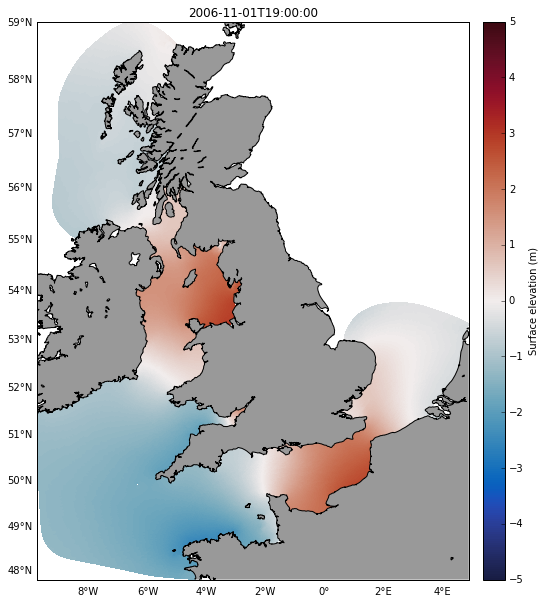

In [5]:
# Plot the surface elevation at the 6th time step.

fig = plt.figure(figsize=(10, 10))  # units are inches for the size
ax = fig.add_subplot(111)

tp = ax.tripcolor(x, y, triangles, FVCOM['zeta'][19, :], cmap=cm.balance)
tp.set_clim(-5, 5)  # clip the colours to +/- 5m.

# Add the coastline.
m.drawmapboundary()
m.drawcoastlines()
m.fillcontinents(color='0.6')
m.drawparallels(parallels, labels=[1, 0, 0, 0], linewidth=0)
m.drawmeridians(meridians, labels=[0, 0, 0, 1], linewidth=0)

# Add a nice colour bar.
div = make_axes_locatable(ax)
cax = div.append_axes("right", size="5%", pad=0.2)
cb = fig.colorbar(tp, cax=cax)
cb.set_label("Surface elevation (m)")

ax.set_title(''.join(FVCOM['Times'][-1, :-7].astype(str)))